In [1]:
!wget  https://raw.githubusercontent.com/andynganle/Data-for-Assignment/master/nyc_subway.csv 

--2022-02-17 21:10:56--  https://raw.githubusercontent.com/andynganle/Data-for-Assignment/master/nyc_subway.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9441559 (9.0M) [text/plain]
Saving to: 'nyc_subway.csv.1'

     0K .......... .......... .......... .......... ..........  0% 1.11M 8s
    50K .......... .......... .......... .......... ..........  1% 1.44M 7s
   100K .......... .......... .......... .......... ..........  1% 2.31M 6s
   150K .......... .......... .......... .......... ..........  2% 1.30M 6s
   200K .......... .......... .......... .......... ..........  2% 1.80M 6s
   250K .......... .......... .......... .......... ..........  3% 1.58M 6s
   300K .......... .......... .......... .......... ..........  3%  670K 7s
 

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind

In [3]:
nyc_subway = pd.read_csv('nyc_subway.csv')

In [4]:
nyc_subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42649 entries, 0 to 42648
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UNIT             42649 non-null  object 
 1   DATEn            42649 non-null  object 
 2   TIMEn            42649 non-null  object 
 3   ENTRIESn         42649 non-null  int64  
 4   EXITSn           42649 non-null  int64  
 5   ENTRIESn_hourly  42649 non-null  float64
 6   EXITSn_hourly    42649 non-null  float64
 7   datetime         42649 non-null  object 
 8   hour             42649 non-null  int64  
 9   day_week         42649 non-null  int64  
 10  weekday          42649 non-null  int64  
 11  station          42649 non-null  object 
 12  latitude         42649 non-null  float64
 13  longitude        42649 non-null  float64
 14  conds            42649 non-null  object 
 15  fog              42649 non-null  int64  
 16  precipi          42649 non-null  float64
 17  pressurei   

In [5]:
nyc_subway.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


In [6]:
nyc_subway.isnull().values.any()

False

In [7]:
for col in nyc_subway.columns:
  print(col + ":", nyc_subway[col].nunique())

UNIT: 240
DATEn: 31
TIMEn: 6
ENTRIESn: 41949
EXITSn: 42045
ENTRIESn_hourly: 7667
EXITSn_hourly: 6212
datetime: 186
hour: 6
day_week: 7
weekday: 2
station: 207
latitude: 233
longitude: 234
conds: 12
fog: 2
precipi: 11
pressurei: 73
rain: 2
tempi: 52
wspdi: 19
meanprecipi: 31
meanpressurei: 269
meantempi: 343
meanwspdi: 242
weather_lat: 37
weather_lon: 37


In [8]:
nyc_subway.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


In [9]:
nyc_subway.tail()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
42644,R464,05-31-11,04:00:00,567311,132804,0.0,0.0,2011-05-31 04:00:00,4,1,...,30.14,0,73.0,6.9,0.0,30.168333,75.366667,7.1,40.660004,-73.844849
42645,R464,05-31-11,08:00:00,290767,59788,0.0,0.0,2011-05-31 08:00:00,8,1,...,30.19,0,80.1,6.9,0.0,30.168333,75.366667,7.1,40.660004,-73.844849
42646,R464,05-31-11,12:00:00,419894,95280,0.0,0.0,2011-05-31 12:00:00,12,1,...,30.20,0,81.0,10.4,0.0,30.168333,75.366667,7.1,40.660004,-73.844849
42647,R464,05-31-11,16:00:00,419894,95280,0.0,0.0,2011-05-31 16:00:00,16,1,...,30.17,0,77.0,13.8,0.0,30.168333,75.366667,7.1,40.660004,-73.844849
42648,R464,05-31-11,20:00:00,419894,95280,0.0,0.0,2011-05-31 20:00:00,20,1,...,30.18,0,69.1,4.6,0.0,30.168333,75.366667,7.1,40.660004,-73.844849


* Ta có fog, rain, Weekend là có 2 giá trị 0 và 1. Với Fog, rain là có và không và weekend là 1 nếu không phải ngày trong tuần 
* day_week tương đương với 7 ngày trong tuần từ thứ 2 đến thứ chủ nhật
* Tổng cộng có 240 UNIT với (UNIT chính là khoá chính)
* TIMEn có 6 múi giớ mối múi giờ cách nhau 4 tiếng 


<AxesSubplot:xlabel='day_week'>

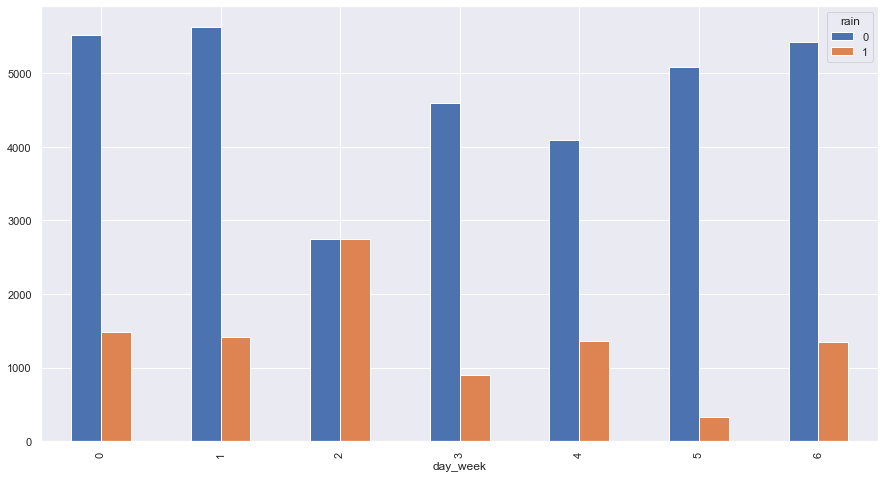

In [10]:
# Theo dõi mưa và không mưa trong tuần
sns.set(rc={'figure.figsize':(15,8)})
plot = nyc_subway[['day_week', 'rain']].groupby(['day_week', 'rain']).rain.count()
plot.unstack().reset_index().plot.bar(x='day_week', y=[0, 1])

In [12]:
nyc_subway['datetime'] = pd.to_datetime(nyc_subway['datetime'], format='%Y-%m-%d  %H:%M:%S')
print(nyc_subway['datetime'].describe())


count                   42649
unique                    186
top       2011-05-28 20:00:00
freq                      240
first     2011-05-01 00:00:00
last      2011-05-31 20:00:00
Name: datetime, dtype: object


C:\Users\vongv\AppData\Local\Temp/ipykernel_8948/3630062526.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(nyc_subway['datetime'].describe())


Vậy đây là dữ liệu được theo dõi trong 1 tháng thống kê thời tiết trong 1 tháng (01-05-2011 đến 31-05-2011)